In [1]:
#Import Functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
#Read File
base = pd.read_csv("/Users/vamsipalukuri/stuff/Projects/IoT/RT_IOT2022.csv")
base

,Unnamed: 0,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,0,38667,1883,tcp,mqtt,32.011598,9,5,3,3,...,0.0,2.972918e+07,2.972918e+07,2.972918e+07,2.972918e+07,0.0,64240,26847,502,MQTT_Publish
1,1,51143,1883,tcp,mqtt,31.883584,9,5,3,3,...,0.0,2.985528e+07,2.985528e+07,2.985528e+07,2.985528e+07,0.0,64240,26847,502,MQTT_Publish
2,2,44761,1883,tcp,mqtt,32.124053,9,5,3,3,...,0.0,2.984215e+07,2.984215e+07,2.984215e+07,2.984215e+07,0.0,64240,26847,502,MQTT_Publish
3,3,60893,1883,tcp,mqtt,31.961063,9,5,3,3,...,0.0,2.991377e+07,2.991377e+07,2.991377e+07,2.991377e+07,0.0,64240,26847,502,MQTT_Publish
4,4,51087,1883,tcp,mqtt,31.902362,9,5,3,3,...,0.0,2.981470e+07,2.981470e+07,2.981470e+07,2.981470e+07,0.0,64240,26847,502,MQTT_Publish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123112,2005,59247,63331,tcp,-,0.000006,1,1,0,0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1024,0,1024,NMAP_XMAS_TREE_SCAN
123113,2006,59247,64623,tcp,-,0.000007,1,1,0,0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1024,0,1024,NMAP_XMAS_TREE_SCAN
123114,2007,59247,64680,tcp,-,0.000006,1,1,0,0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1024,0,1024,NMAP_XMAS_TREE_SCAN
123115,2008,59247,65000,tcp,-,0.000006,1,1,0,0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1024,0,1024,NMAP_XMAS_TREE_SCAN


In [3]:
numeric_columns = base.select_dtypes(include='number')
attack_type_column = base['Attack_type']
iot_data = pd.concat([numeric_columns, attack_type_column], axis=1)
iot_data = iot_data.drop('Unnamed: 0', axis=1)
iot_data

,id.orig_p,id.resp_p,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,38667,1883,32.011598,9,5,3,3,0.281148,0.156193,0.437341,...,0.0,2.972918e+07,2.972918e+07,2.972918e+07,2.972918e+07,0.0,64240,26847,502,MQTT_Publish
1,51143,1883,31.883584,9,5,3,3,0.282277,0.156821,0.439097,...,0.0,2.985528e+07,2.985528e+07,2.985528e+07,2.985528e+07,0.0,64240,26847,502,MQTT_Publish
2,44761,1883,32.124053,9,5,3,3,0.280164,0.155647,0.435811,...,0.0,2.984215e+07,2.984215e+07,2.984215e+07,2.984215e+07,0.0,64240,26847,502,MQTT_Publish
3,60893,1883,31.961063,9,5,3,3,0.281593,0.156440,0.438033,...,0.0,2.991377e+07,2.991377e+07,2.991377e+07,2.991377e+07,0.0,64240,26847,502,MQTT_Publish
4,51087,1883,31.902362,9,5,3,3,0.282111,0.156728,0.438839,...,0.0,2.981470e+07,2.981470e+07,2.981470e+07,2.981470e+07,0.0,64240,26847,502,MQTT_Publish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123112,59247,63331,0.000006,1,1,0,0,167772.160000,167772.160000,335544.320000,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1024,0,1024,NMAP_XMAS_TREE_SCAN
123113,59247,64623,0.000007,1,1,0,0,144631.172414,144631.172414,289262.344828,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1024,0,1024,NMAP_XMAS_TREE_SCAN
123114,59247,64680,0.000006,1,1,0,0,167772.160000,167772.160000,335544.320000,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1024,0,1024,NMAP_XMAS_TREE_SCAN
123115,59247,65000,0.000006,1,1,0,0,167772.160000,167772.160000,335544.320000,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1024,0,1024,NMAP_XMAS_TREE_SCAN


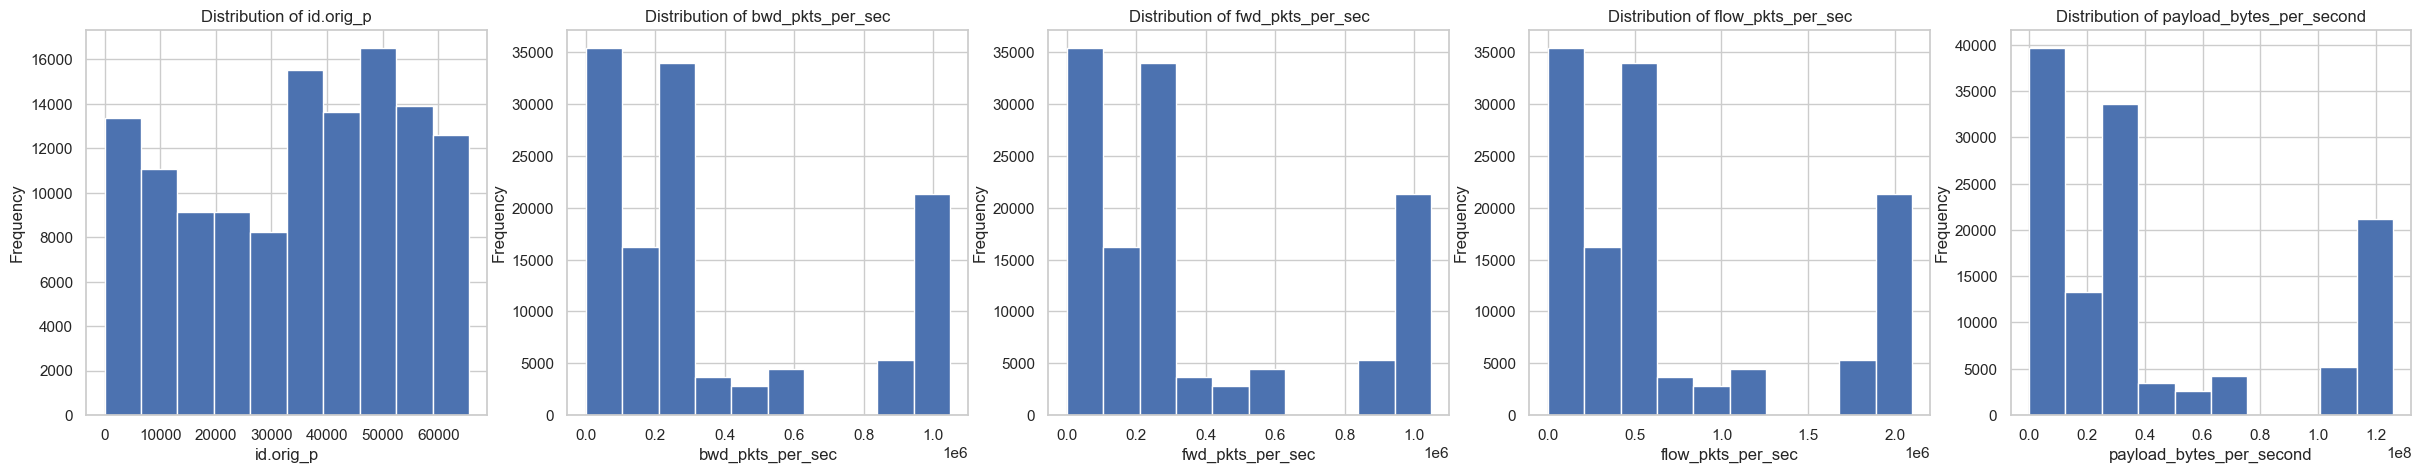

In [90]:
fig, axes = plt.subplots(1, 5, figsize=(30, 5))
cols = ['id.orig_p', 'bwd_pkts_per_sec', 'fwd_pkts_per_sec', 'flow_pkts_per_sec', 'payload_bytes_per_second']

for ax, col in zip(axes.flatten(), cols):
    data = iot_data[col]
    ax.hist(data)
    ax.set_title(f"Distribution of {col}")
    ax.set_xlabel(f'{col}')
    ax.set_ylabel('Frequency')

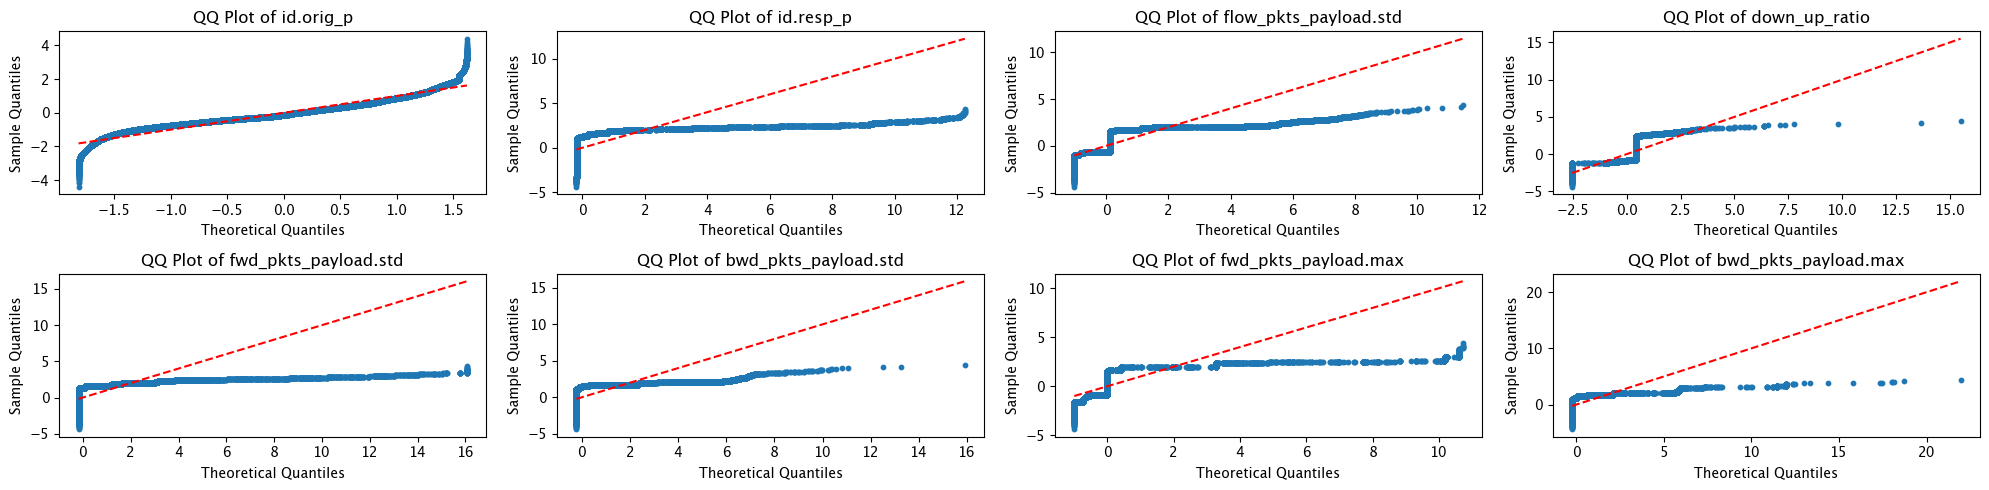

In [4]:
fig, axes = plt.subplots(2, 4, figsize=(20, 5))
cols = ['id.orig_p', 'id.resp_p', 'flow_pkts_payload.std', 'down_up_ratio', 'fwd_pkts_payload.std', 'bwd_pkts_payload.std', 'fwd_pkts_payload.max', 'bwd_pkts_payload.max']

for ax, col in zip(axes.flatten(), cols):
    data = iot_data[col]
    scaler = StandardScaler()
    data = scaler.fit_transform(data.values.reshape(-1, 1)).flatten()
    quantiles, values = stats.probplot(data, fit=False)
    ax.scatter(values, quantiles, marker='o', s=10)
    ax.plot([np.min(data), np.max(data)], [np.min(data), np.max(data)], color='red', linestyle='--')
    ax.set_title(f"QQ Plot of {col}")
    ax.set_xlabel(f'Theoretical Quantiles')
    ax.set_ylabel('Sample Quantiles')

plt.tight_layout()
plt.show()

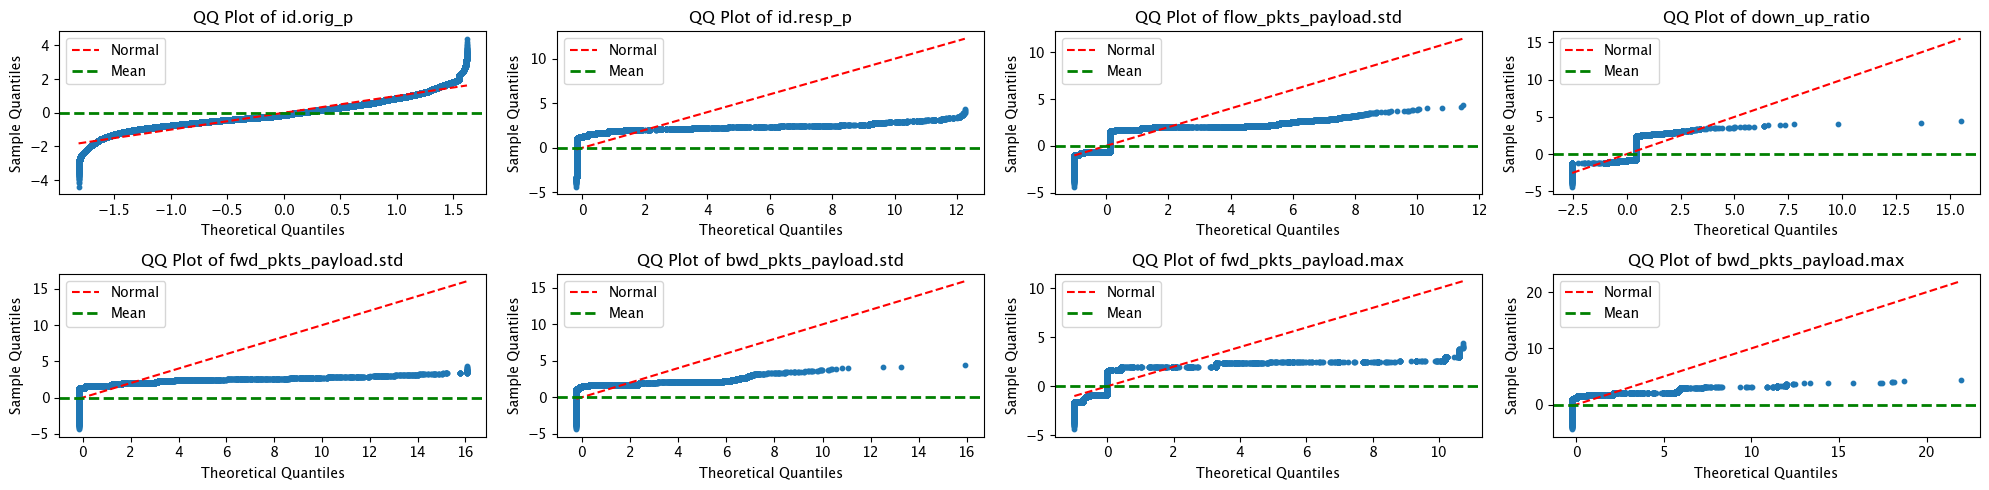

In [12]:

fig, axes = plt.subplots(2, 4, figsize=(20, 5))
cols = ['id.orig_p', 'id.resp_p', 'flow_pkts_payload.std', 'down_up_ratio', 'fwd_pkts_payload.std', 'bwd_pkts_payload.std', 'fwd_pkts_payload.max', 'bwd_pkts_payload.max']

for ax, col in zip(axes.flatten(), cols):
    data = iot_data[col]
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data.values.reshape(-1, 1)).flatten()
    
    quantiles, values = stats.probplot(scaled_data, fit=False)
    ax.scatter(values, quantiles, marker='o', s=10)
    ax.plot([np.min(scaled_data), np.max(scaled_data)], [np.min(scaled_data), np.max(scaled_data)], color='red', linestyle='--', label='Normal')
    
    # Plot the mean as a horizontal line at 0 for standardized data
    ax.axhline(y=0, color='green', linestyle='--', linewidth=2, label='Mean')
    
    ax.set_title(f"QQ Plot of {col}")
    ax.set_xlabel(f'Theoretical Quantiles')
    ax.set_ylabel('Sample Quantiles')
    ax.legend()

plt.tight_layout()
plt.show()


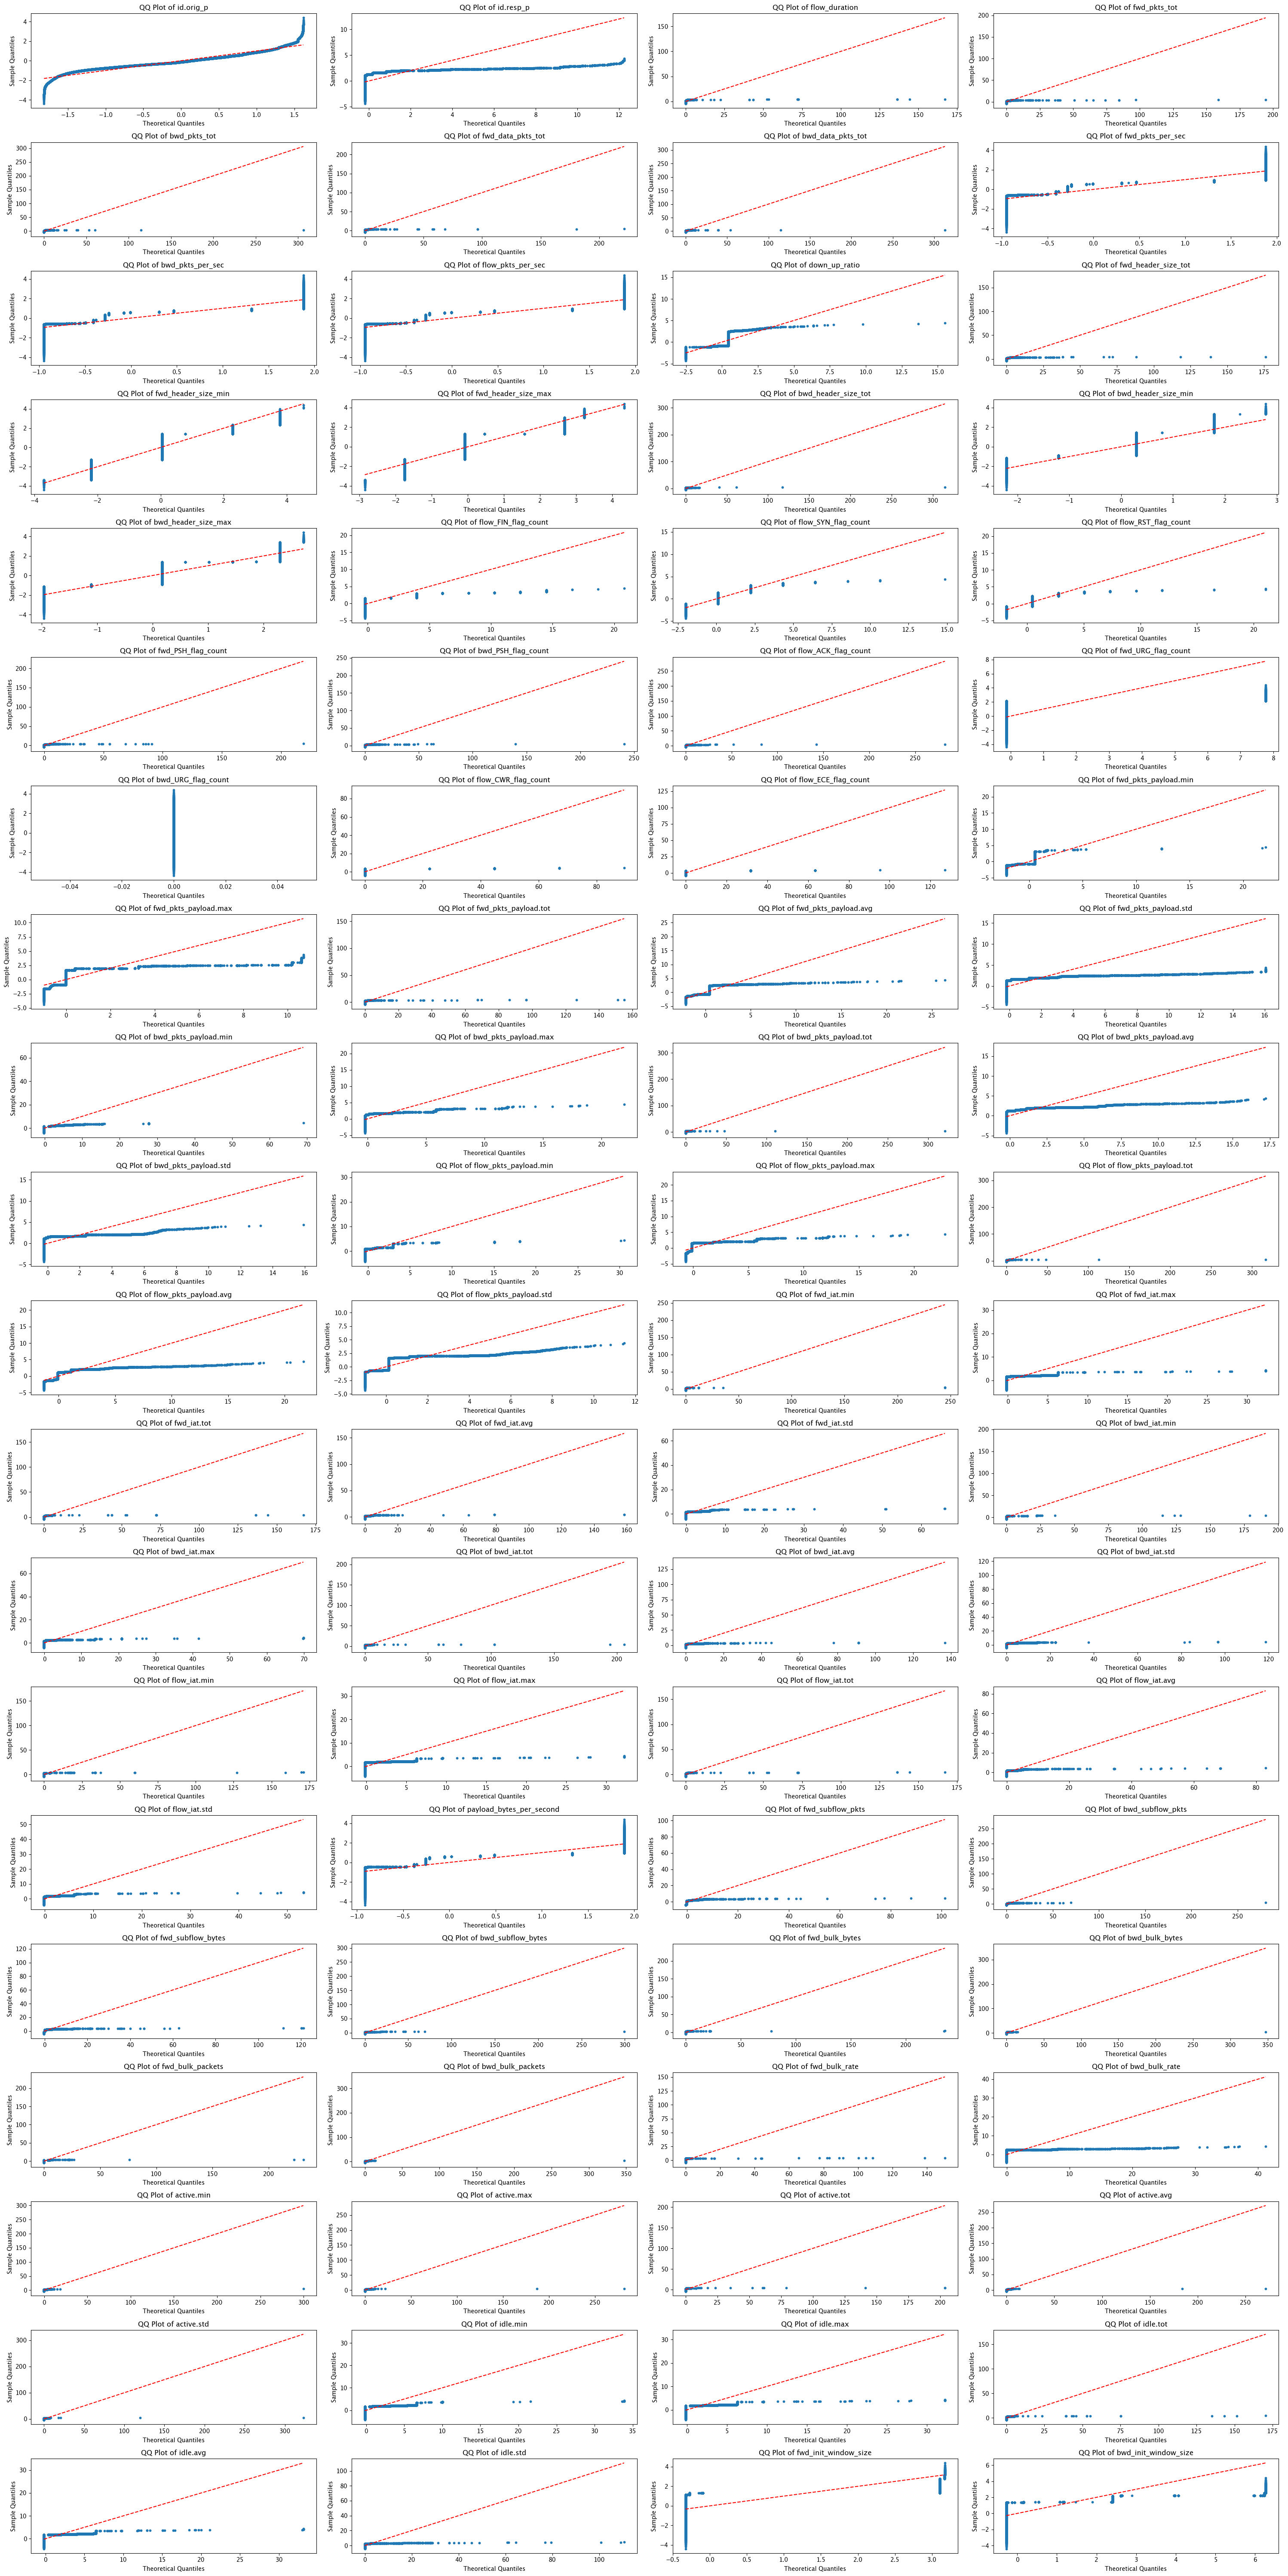

In [59]:
fig, axes = plt.subplots(20, 4, figsize=(30, 60))

for ax, col in zip(axes.flatten(), iot_data.columns):
    data = iot_data[col]
    scaler = StandardScaler()
    data = scaler.fit_transform(data.values.reshape(-1, 1)).flatten()
    quantiles, values = stats.probplot(data, fit=False)
    ax.scatter(values, quantiles, marker='o', s=10)
    ax.plot([np.min(data), np.max(data)], [np.min(data), np.max(data)], color='red', linestyle='--')
    ax.set_title(f"QQ Plot of {col}")
    ax.set_xlabel(f'Theoretical Quantiles')
    ax.set_ylabel('Sample Quantiles')

plt.tight_layout()
plt.show()


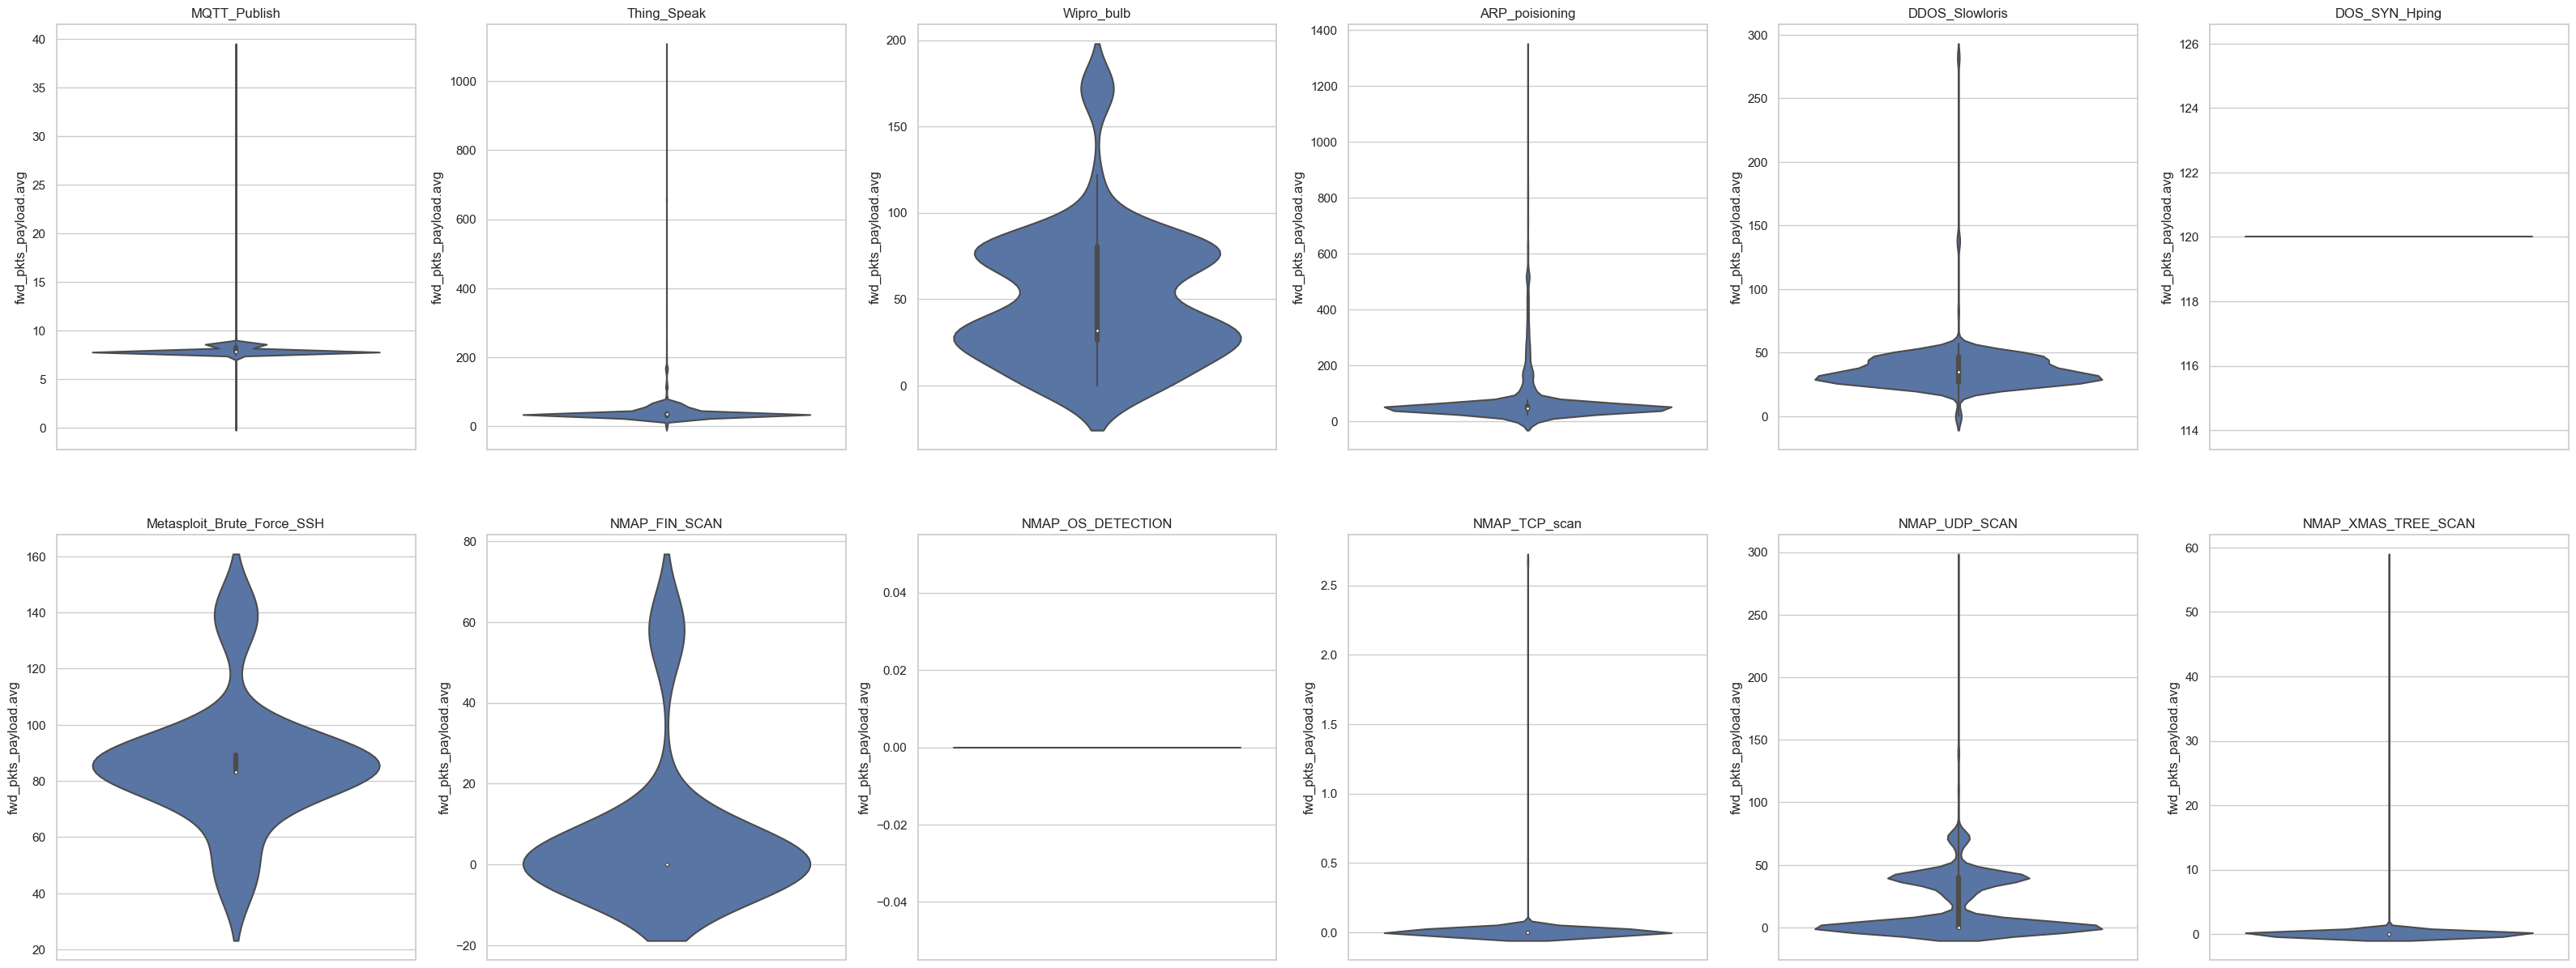

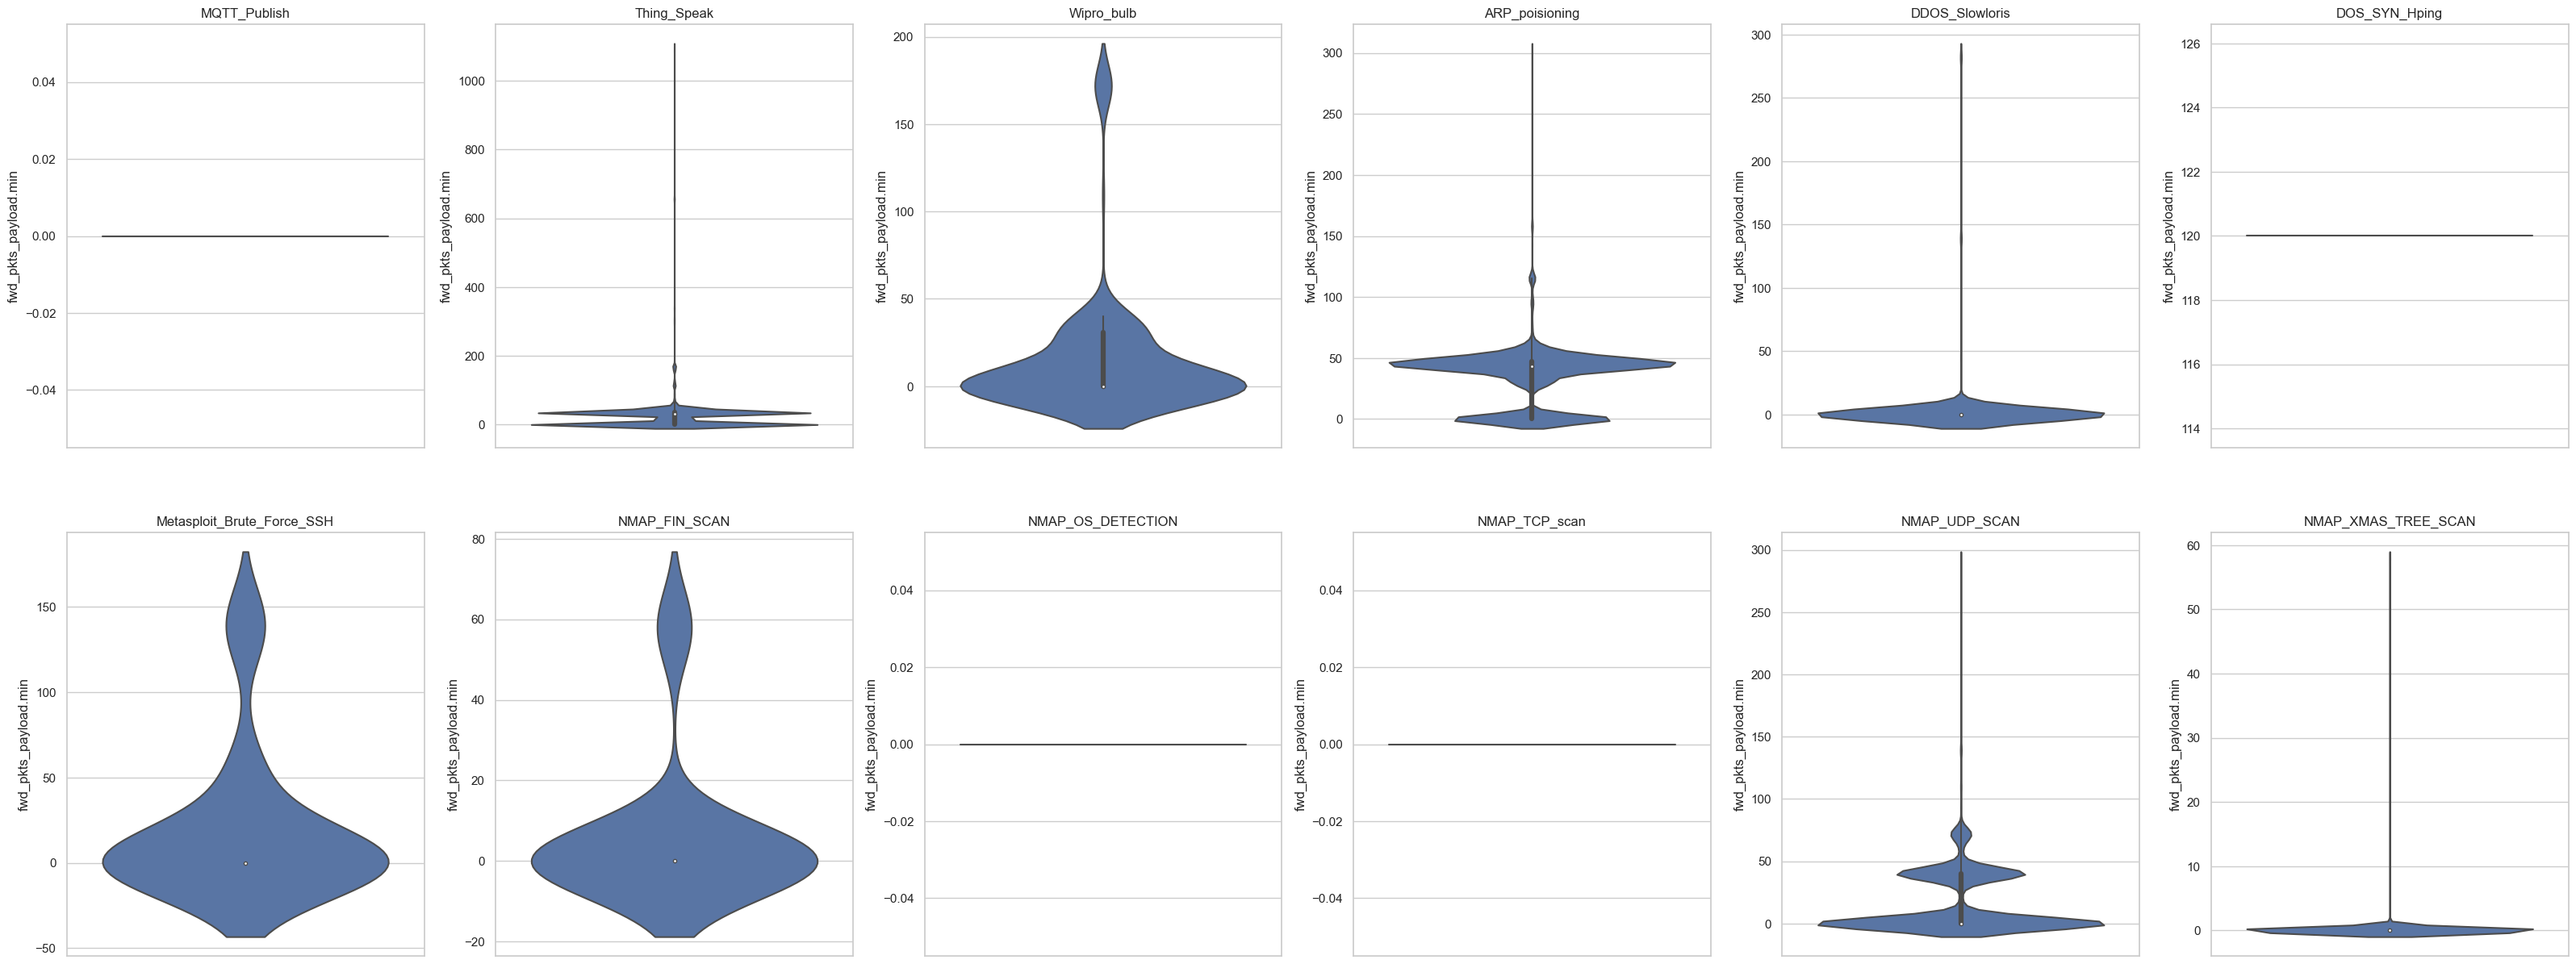

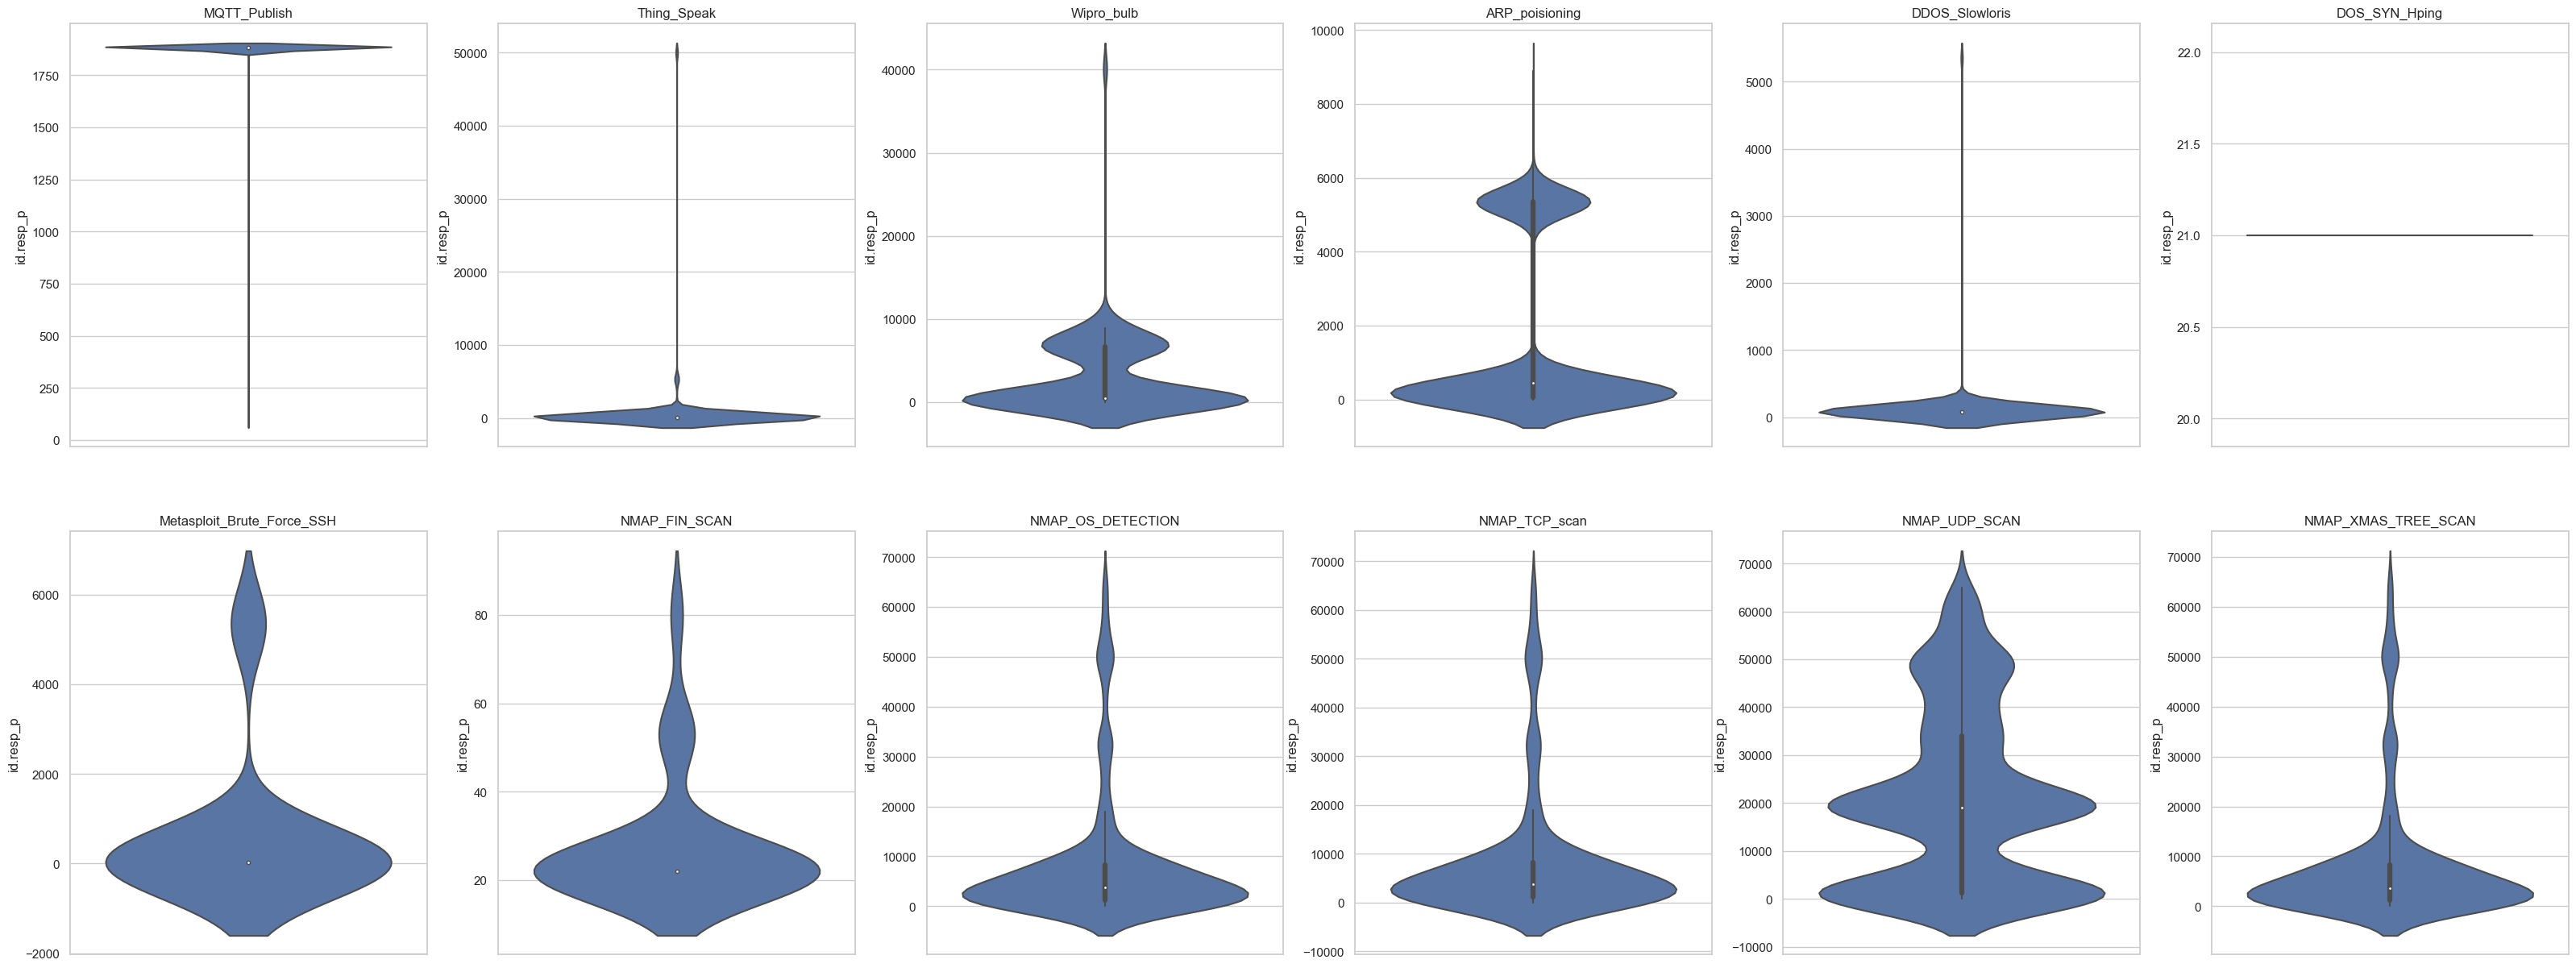

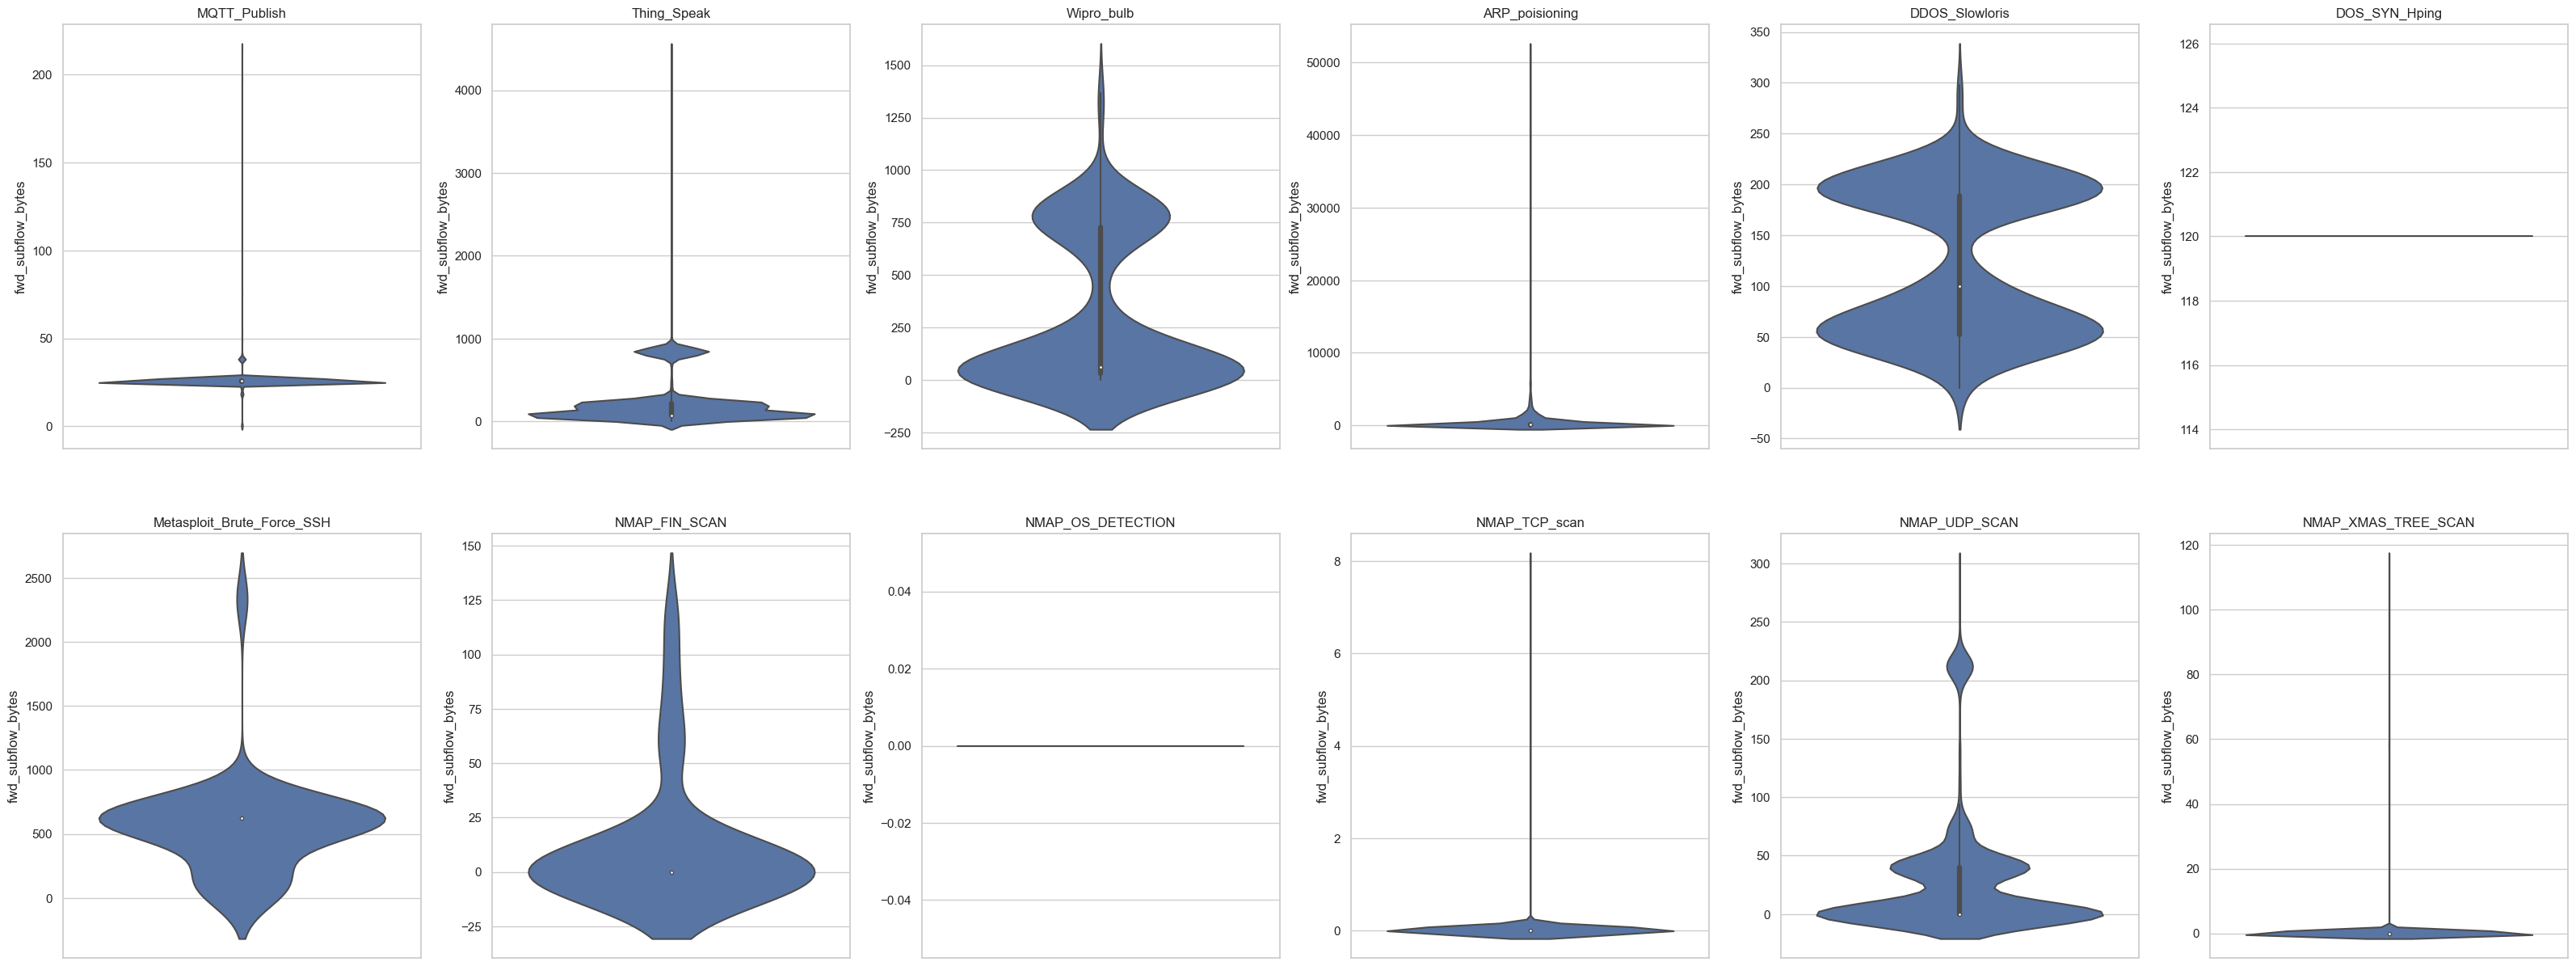

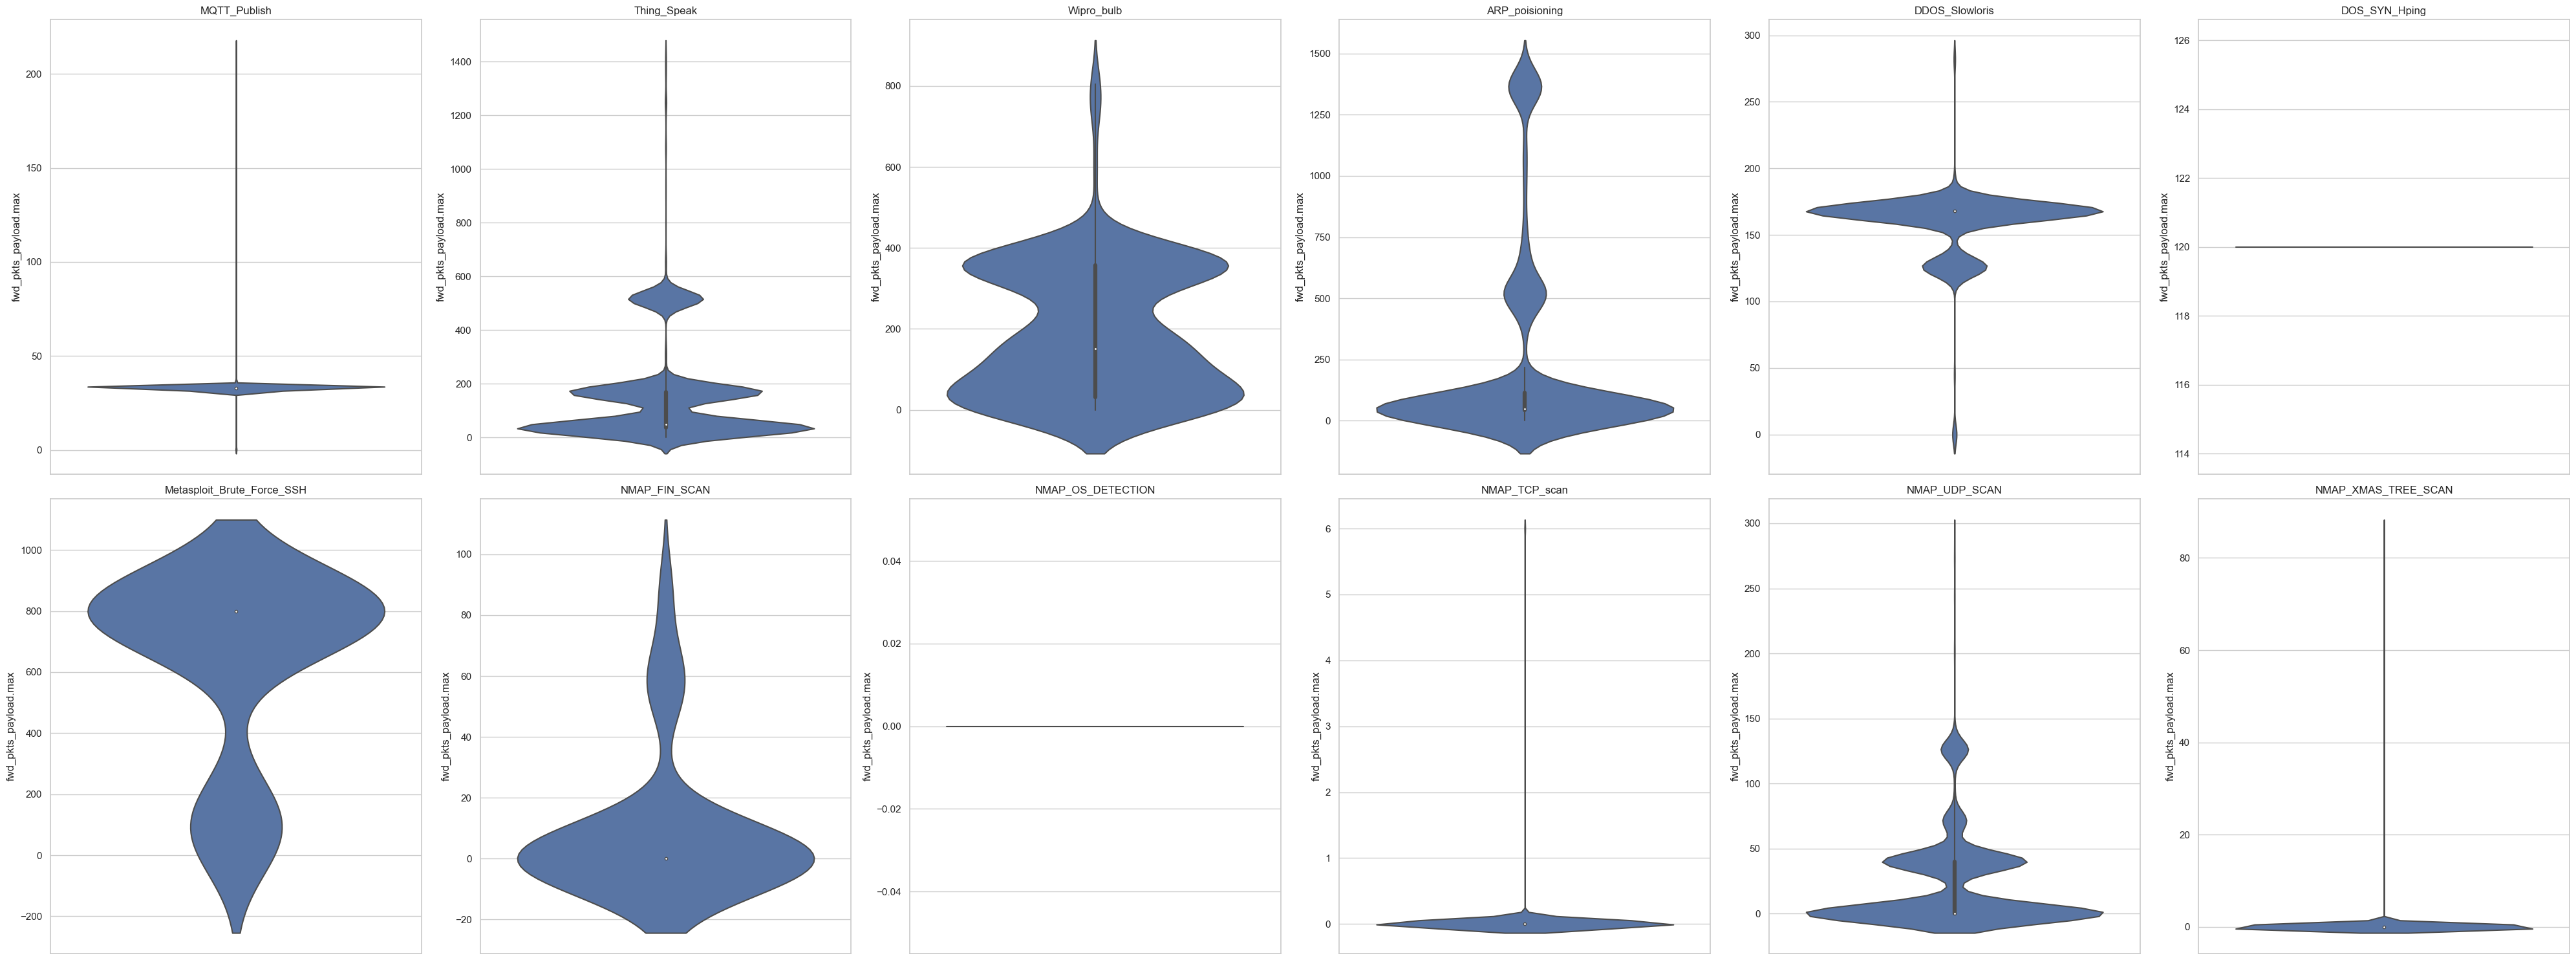

In [80]:
imp_preds = ['fwd_pkts_payload.avg', 'fwd_pkts_payload.min', 'id.resp_p', 'fwd_subflow_bytes', 'fwd_pkts_payload.max']
sns.set(style = 'whitegrid')
for pred in imp_preds:
    fig, axes = plt.subplots(2, 6, figsize=(40, 15))
    for ax, atk_type in zip(axes.flatten(), iot_data['Attack_type'].unique()):
        data = iot_data[iot_data['Attack_type'] == atk_type][pred]
        sns.violinplot(y=data, ax=ax)
        ax.set_title(atk_type)
plt.tight_layout()